# Tasks
### This notebook contains my solution to the Tasks assignment for the Fundamentals of Data Analysis Module

#### Task 1 - October 5th, 2020 
Write a Python function called counts that takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values. So, the input ['A', 'A', 'B', 'C', 'A'] should have output {'A': 3, 'B': 1, 'C': 1} . Your code should not depend on any module from the standard library or otherwise. You should research the task first and include a description with references of your algorithm in the notebook.
#### Research
I did not need to research this task as such, as the steps required to generate the dictionary from the list are easy to think through and implement:
1. One will first need to create an empty dictionary
2. One will then need to iterate through the list, and updating the dictionary for every item in the list.
3. If an item in the list is not present as a key in the dictionary, one updates to the dictionary to include that item as a key, with its value as 1.
4. On the other hand, if the item in the list is present in the dictionary as a key, then one increase the value of the key by one.
For how to create an empty dictionary, see here [1].
For how to update a dictionary keys and values, see here [2].

[1] https://www.tutorialspoint.com/How-to-create-an-empty-dictionary-in-Python

[2] https://stackoverflow.com/questions/1024847/how-can-i-add-new-keys-to-a-dictionary

In [19]:
def counts(list):
    dict = {}
    for i in list:
        if i not in dict:
            dict[i] = 1
        else:
            dict[i] += 1
    return dict

In [20]:
counts(['A', 'A', 'B', 'C', 'A'])

{'A': 3, 'B': 1, 'C': 1}

#### Task 2, November 2nd, 2020: 
Write a Python function called dicerolls that simulates
rolling dice. Your function should take two parameters: the number of dice k and
the number of times to roll the dice n. The function should simulate randomly
rolling k dice n times, keeping track of each total face value. It should then return
a dictionary with the number of times each possible total face value occurred. So,
calling the function as diceroll(k=2, n=1000) should return a dictionary like:
{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}
You can use any module from the Python standard library you wish and you should
include a description with references of your algorithm in the notebook.

#### Research
As above, I did not need to research this task. The logic is straightforward:
1. To simulate the dice rolls, we can use random.choice, and pass it an array of integers, 1 through 6. We do this for every dice that is rolled, and add the result to a 'total' variable that will contain the totals for each set of die rolled. We then add the total of each set of die to a list, resetting the value of that 'total' variable for each set of dice to be rolled. All of this can easily be achieved with basic for loops.
2. To then get a dictionary that where the keys are the totals and then values are the number of times they have appeared, we can just use the collections' module's Counter method, which takes in a list and returns a dictionary with each item in the list and the number of times it appears [1]. One could do this manually, but the collections module is in the standard library [2], and is perfect for our demands. 

[1] https://docs.python.org/3/library/collections.html#collections.Counter
[2] https://docs.python.org/3/library/index.html



In [21]:
import random
from collections import Counter

def dicerolls(k, n):
    total = 0 #store the total of the faces for each set of rolls
    result = [] # store the totals in here
    for i in range(n):
        for i in range(k):
            total += random.choice([1,2,3,4,5,6]) # roll the dice and add the value of each roll to the 'total' variable
        result.append(total) # append the total of each set to the 'result' list
        total = 0 # reset total to zero for the next set of rolls
    return dict(Counter(result)) # use Counter, and convert its return value to a dict, as required

dicerolls(2,9) # test

{8: 1, 7: 4, 11: 1, 10: 1, 4: 1, 3: 1}

#### Task 3, November 16th, 2020:
The numpy.random.binomial function can be used to
simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a
coin is flipped many times then the number of heads is well approximated by a
bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of
getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively
low, and the chances of getting any other number of heads decreases as you move
away from 50 in either direction towards 0 or 100. Write some python code that
simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track
of the number of heads in each of the 1,000 simulations. Select an appropriate
plot to depict the resulting list of 1,000 numbers, showing that it roughly follows
a bell-shaped curve. You should explain your work in a Markdown cell above the
code

#### Research
I have already experimented with numpy.random's binominal function in the Programming for Data Analysis module [1]. Although we could use for loops and the numpy.random.choice function to simulate the sets of coin tosses, the binomial function can handle this for us itself. However, I will create the sample manually, as that seems to be what is implied in the question. I will then plot a histogram, and finally a scatter plot to show the bell-curve shape that the sample takes. To close, I will perform a statistical test for normality to show that the data is highly unlikely to have actually been drawn from a normal distribution.

[1] https://github.com/ashleycampion/GMIT_Programming_for_data_analysis_Assignment/blob/main/Programming%20for%20Data%20Analysis%20-%20Assignment.ipynb

The collections package's 'Counter' function is a useful way to understand the results without having to plot them. As the probability of True is here 0.5, we would expect, for sets of a thousand events \(i.e. a thousand coin tosses\), that our most frequently resulting numbers would be close to 500.

Counter({700: 276073, 701: 275828, 699: 274503, 702: 272979, 698: 272976, 703: 270130, 697: 267875, 704: 265754, 696: 263450, 705: 259544, 695: 258816, 706: 254790, 694: 250910, 707: 246641, 693: 243994, 708: 237291, 692: 234843, 709: 228040, 691: 225092, 710: 218419, 690: 214470, 711: 208730, 689: 204670, 712: 196518, 688: 192808, 713: 186033, 687: 182351, 714: 173858, 686: 170739, 715: 162327, 685: 159959, 716: 150458, 684: 148481, 717: 139970, 683: 136700, 718: 128863, 682: 126446, 719: 118136, 681: 115318, 720: 106756, 680: 105628, 721: 97248, 679: 95408, 722: 87277, 678: 86972, 723: 78868, 677: 78105, 724: 70368, 676: 69741, 675: 62536, 725: 62280, 674: 55253, 726: 54709, 673: 48515,

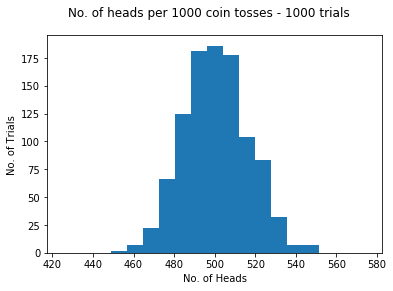

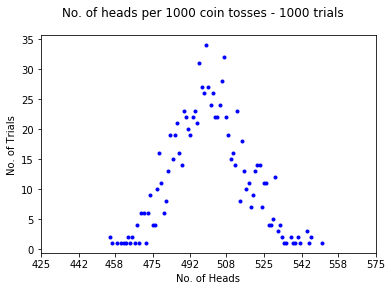

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

#rng = np.random.default_rng()
#n, p = 1000, .5  # number of trials, probability of each trial
#binom = rng.binomial(n, p, 1000) # 10000 represents the number of sets of trials

# the below may take a few seconds to run
binomial = []
for i in range(1000):
    temp = 0
    for i in range(1000):
        temp += np.random.choice([0,1])
    binomial.append(temp)
    

print("The collections package's 'Counter' function is a useful way \
to understand the results without having to plot them. \
As the probability of True is here 0.5, we would expect, for sets of a thousand \
events \(i.e. a thousand coin tosses\), that our most frequently \
resulting numbers would be close to 500.\n")
print(Counter(binom))

print("\nWe can see this more easily with a histogram and a scatter plot:")

%matplotlib inline
fig, ax = plt.subplots()
plt.suptitle("No. of heads per 1000 coin tosses - 1000 trials")
plt.hist(binomial, bins=np.linspace(425,575,20))
ax.set_ylabel("No. of Trials")
ax.set_xlabel("No. of Heads")

plt.show()

%matplotlib inline
fig, ax = plt.subplots()
plt.suptitle("No. of heads per 1000 coin tosses - 1000 trials")
labels, counts = np.unique(binomial, return_counts=True)
ax.plot(labels, counts, 'b.')
ax.set_ylabel("No. of Trials")
ax.set_xlabel("No. of Heads")
plt.gca().set_xticks(np.linspace(425,575,10).round())
plt.show()

By gradually increasing the number of trials from 100 to 10000000, we can more clearly see the distribution begin to look more and more like the bell-curve of the normal distribution

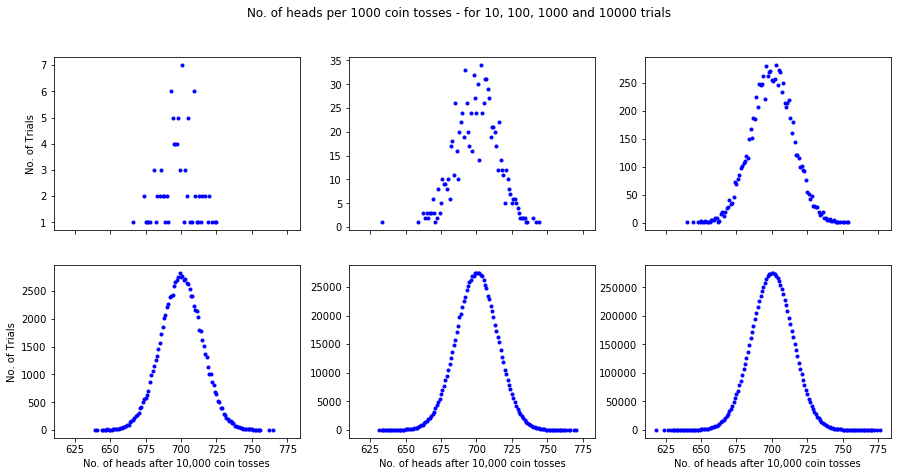

In [23]:
rng = np.random.default_rng()

%matplotlib inline
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(15,7))
plt.suptitle("No. of heads per 1000 coin tosses - for 10, 100, 1000 and 10000 trials")

n, p = 1000, .7  # number of trials, probability of each trial

binom = rng.binomial(n, p, 100)
labels, counts = np.unique(binom, return_counts=True)
ax1.plot(labels, counts, 'b.')
ax1.set_ylabel("No. of Trials")

binom = rng.binomial(n, p, 1000)
labels, counts = np.unique(binom, return_counts=True)
ax2.plot(labels, counts, 'b.')


binom = rng.binomial(n, p, 10000)
labels, counts = np.unique(binom, return_counts=True)
ax3.plot(labels, counts, 'b.')

binom = rng.binomial(n, p, 100000)
labels, counts = np.unique(binom, return_counts=True)
ax4.plot(labels, counts, 'b.')
ax4.set_xlabel("No. of heads after 10,000 coin tosses")
ax4.set_ylabel("No. of Trials")

binom = rng.binomial(n, p, 1000000)
labels, counts = np.unique(binom, return_counts=True)
ax5.plot(labels, counts, 'b.')
ax5.set_xlabel("No. of heads after 10,000 coin tosses")

binom = rng.binomial(n, p, 10000000)
labels, counts = np.unique(binom, return_counts=True)
ax6.plot(labels, counts, 'b.')
ax6.set_xlabel("No. of heads after 10,000 coin tosses")
plt.show()

Of course, just because a distribution *looks* normal, does not actually mean it *is* normal. Rather than relying on visualization, we can perform a statistical test to check whether it is reasonable to assume that our sample could have been drawn from a normal distribution. The D'Agostino K^2 test is one such test for normality.


I will now run a D'Agostino K^2 test [1] to test if this distribution, where p is 0.5, n is 1,000 and the number of sets of trials is also 1,000, could have arisen from normally distributed data. This test computes two values, skew and kurtosis:

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality. Scipy.stats has a 'normaltest' function that performs this test, returning a value (the 'Test Statistic' [2]) that is generated from the skew and the kurtosis of the data, as well as a p-value. Of course, the generation of a Test Statistic and a p-value is a common feature of statistical tests. Essentially, the evaluation process is as follows:
Once the data is pushed through the testing function, a single value, the Test Statistic, is produced. This value can be said to 'represent' the data from the perspective of the test.

Although generally a lower Test Statistic value indicates that the hypothesis being tested is correct, because the actual Test Statistic value is only meaningful from the perspective of the particular kind of test being run, we need to know how to interpret it independent of that particular kind of test. As such, a corresponding 'p-value' is generated, which essentially informs us of the probability that the Test Statistic generated would have been generated if our hypothesis was correct. If this p-value is close to zero, we can assume that the hypothesis was not correct. Generally, the maximum acceptable value of the p-value for a correctly assumed hypothesis (what is called the 'Null Hyopthesis') is 0.05.

Thus, if the p-value is greater than 0.05, we would conclude that it is highly likely that the sample was drawn from a normal distribution. 

[1] https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

[2] https://en.wikipedia.org/wiki/Test_statistic

In [24]:
import scipy.stats as ss
for n,p,i in [(1000,0.5,1000)]:
    stat, pValue = ss.normaltest(binomial)
    print(f"For {i} sets of {n} trials at probability {p}, the results are as follows:")
    print('Test Statistic=%.3f, P-value=%.3f' % (stat, pValue))
    alpha = 0.05 # we will accept anything over 95% certainty
    if pValue > alpha:
        print('The data appears to be normally distributed.')
    else:
        print('The data does not appear to be normally distributed - a warning not to always trust your eyes!')

For 1000 sets of 1000 trials at probability 0.5, the results are as follows:
Test Statistic=3.033, P-value=0.220
The data appears to be normally distributed.


#### Task 4, November 30th, 2020: 
Simpson’s paradox is a well-known statistical paradox where a trend evident in a number of groups reverses when the groups are combined into one big data set. Use numpy to create four data sets, each with an x array and a corresponding y array, to demonstrate Simpson’s paradox. You might create your x arrays using numpy.linspace and create the y array for each x using notation like y = a * x + b where you choose the a and b for each x , y pair to demonstrate the paradox. You might see the Wikipedia page for Simpson’s paradox for inspiration.


#### Research